# Test Script for Data Read-In

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from matplotlib import pyplot as plt
import plotly.express as px

# Load in Data

In [3]:
# Load calendar data
calendar = pd.read_csv("../data/raw/calendar.csv")

# Load reviews data
#review_map = pd.read_csv("../data/raw/reviews_ids.csv")
reviews = pd.read_csv("../data/raw/reviews.csv")

# Load listings data
#listings_map = pd.read_csv("../data/raw/listings_ids.csv")
listings = pd.read_csv("../data/raw/listings.csv")

# Load neighborhoods
neighborhoods = pd.read_csv("../data/raw/neighbourhoods.csv")

# EDA

## Calendar

In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2021-08-04,f,$160.00,$160.00,2,1125
1,96383,2021-08-04,f,$49.00,$49.00,30,365
2,96383,2021-08-05,f,$49.00,$49.00,30,365
3,96383,2021-08-06,f,$49.00,$49.00,30,365
4,96383,2021-08-07,f,$49.00,$49.00,30,365


In [5]:
# Remove dollar signs
calendar[calendar.columns[3]] = calendar[calendar.columns[3]].replace('[\$,]', '', regex=True).astype(float)
calendar[calendar.columns[4]] = calendar[calendar.columns[4]].replace('[\$,]', '', regex=True).astype(float)

In [6]:
# Convert date string to date object
calendar['date'] = pd.to_datetime(calendar.date)

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412285 entries, 0 to 2412284
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 128.8+ MB


In [8]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,2.412285e+06,2.412088e+06,2.412088e+06,2.412285e+06,2.412285e+06
mean,2.667912e+07,2.499340e+02,2.496728e+02,3.545847e+01,6.844032e+06
std,1.608328e+07,7.560751e+02,7.560244e+02,1.102532e+02,1.210322e+08
min,9.580000e+02,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00
25%,1.251098e+07,9.500000e+01,9.500000e+01,2.000000e+00,9.000000e+01
50%,2.816077e+07,1.500000e+02,1.500000e+02,3.000000e+01,1.125000e+03
75%,4.084774e+07,2.500000e+02,2.500000e+02,3.000000e+01,1.125000e+03
max,5.143887e+07,2.500000e+04,2.500000e+04,1.125000e+03,2.147484e+09


In [9]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2021-08-04,f,160.0,160.0,2,1125
1,96383,2021-08-04,f,49.0,49.0,30,365
2,96383,2021-08-05,f,49.0,49.0,30,365
3,96383,2021-08-06,f,49.0,49.0,30,365
4,96383,2021-08-07,f,49.0,49.0,30,365


In [10]:
calendar_distinct = calendar[['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']]

## Reviews

In [12]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282379 entries, 0 to 282378
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     282379 non-null  int64 
 1   id             282379 non-null  int64 
 2   date           282379 non-null  object
 3   reviewer_id    282379 non-null  int64 
 4   reviewer_name  282379 non-null  object
 5   comments       282234 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.9+ MB


In [14]:
reviews.describe()

,listing_id,id,reviewer_id
count,2.823790e+05,2.823790e+05,2.823790e+05
mean,1.243909e+07,1.211883e+16,7.825164e+07
std,1.197161e+07,6.879123e+16,8.697876e+07
min,9.580000e+02,1.981000e+03,1.000000e+00
25%,2.178509e+06,1.201905e+08,1.360432e+07
50%,8.351923e+06,2.919415e+08,4.409823e+07
75%,1.957085e+07,5.287919e+08,1.166616e+08
max,5.121817e+07,4.210770e+17,4.163696e+08


In [15]:
# Change format of date
reviews['date'] = pd.to_datetime(reviews.date)

In [16]:
# Replace NANs
reviews['comments'].replace(to_replace=np.nan, value="", inplace=True)

In [17]:
# Get length of comments
review_lens = [len(reviews.comments.values[i]) for i in range(len(reviews))]
reviews['nchar_review'] = review_lens

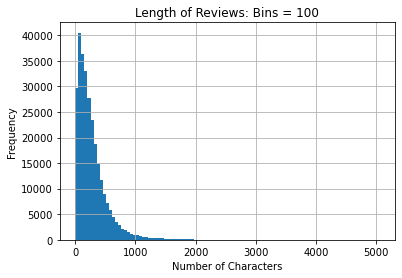

In [18]:
# Investigate reviews
review_bins = 100
reviews.nchar_review.hist(bins=review_bins)
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.title("Length of Reviews: Bins = " + str(review_bins));

In [19]:
# Number of unique reviewers
print(f"Number of Unique Reviewers: {len(set(reviews.reviewer_id))}")

Number of Unique Reviewers: 257057


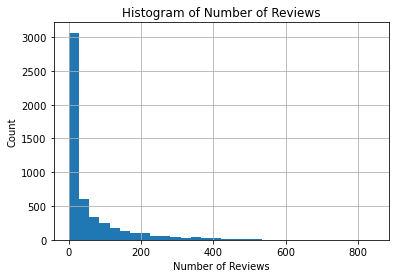

In [20]:
# Plot the number of reviews per listing
reviews.listing_id.value_counts().hist(bins=30)
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.title("Histogram of Number of Reviews");

#### Notes:
1. Number of characters in reviews tend to follow a Poisson distribution centered around 100.
2. The number of unique reviewers is 254664, while the number of total reviewers is 279937.
3. The number of reviews per listing is similar to an exponential distribution that falls off rapidly.  Some properties with over 800 reviews.

#### Feature Engineering Ideas:
1. Sentiment analysis for a "positive", "negative", "neutral" label.
2. Number of reviews per listing.  More reviewed listings could be more valuable.
3. Clustering of words in reviews to identify subgroups of reviews.

## Listings

In [21]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20210804005755,2021-08-04,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,100%,92%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, California, United States",Western Addition,NaN,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Iron"", ""Hot water"", ""Essentials"", ""Oven"", ""H...",$160.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,2,10,18,129,2021-08-04,291,34,4,2014-10-05,2021-07-29,4.87,4.94,4.94,4.96,4.90,4.98,4.78,City Registration Pending,f,1,1,0,0,3.50
1,5858,https://www.airbnb.com/rooms/5858,20210804005755,2021-08-04,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a few hours,70%,74%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, California, United States",Bernal Heights,NaN,37.74474,-122.42089,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Fire extinguisher"", ""Iron"", ""Essentials"", ""D...",$235.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,30,60,90,365,2021-08-04,111,0,0,2009-11-24,2015-08-28,4.88,4.85,4.87,4.89,4.85,4.77,4.68,NaN,f,1,1,0,0,0.78
2,7918,https://www.airbnb.com/rooms/7918,20210804005755,2021-08-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,10,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, California, United States",Haight Ashbury,NaN,37.76555,-122.45213,Private room in r

In [22]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.611000e+03,6.611000e+03,6.611000e+03,6611.000000,6611.000000,0.0,6611.000000,6611.000000,6611.000000,0.0,5715.000000,6531.000000,6611.000000,6611.000000,6609.000000,6609.000000,6.609000e+03,6.609000e+03,6609.000000,6.609000e+03,0.0,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,5076.000000,5040.000000,5040.000000,5039.000000,5040.000000,5039.000000,5039.000000,6611.000000,6611.000000,6611.000000,6611.000000,5076.000000
mean,2.668582e+07,2.021080e+13,8.317538e+07,70.977008,70.977008,NaN,37.768470,-122.429273,3.094237,NaN,1.511286,1.728832,19.566178,660.017093,20.400666,36.182781,3.250177e+06,7.149383e+06,35.453155,6.836290e+06,NaN,8.710936,21.891847,37.274542,155.293450,42.713508,5.135834,0.762214,4.730855,4.818859,4.770004,4.878456,4.855778,4.797916,4.664509,15.174255,10.688852,3.670852,0.617153,1.702455
std,1.608668e+07,0.000000e+00,1.077564e+08,318.284788,318.284788,NaN,0.022811,0.026761,1.840800,NaN,0.862230,1.227852,32.817765,12304.764236,41.131310,112.109949,8.347681e+07,1.237035e+08,108.937860,1.206005e+08,NaN,10.684873,21.848438,33.333997,131.539362,82.658374,13.990325,2.075438,0.569652,0.397308,0.412537,0.328178,0.385224,0.389836,0.441710,33.001965,31.969253,9.504946,3.723093,3.802502
min,9.580000e+02,2.021080e+13,1.169000e+03,0.000000,0.000000,NaN,37.708370,-122.512460,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.251107e+07,2.021080e+13,4.430421e+06,1.000000,1.000000,NaN,37.753175,-122.442230,2.000000,NaN,1.000000,1.000000,2.000000,30.000000,2.000000,2.000000,9.000000e+01,9.000000e+01,2.000000,9.000000e+01,NaN,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,4.710000,4.810000,4.710000,4.890000,4.880000,4.770000,4.590000,1.000000,0.000000,0.000000,0.000000,0.200000
50%,2.816403e+07,2.021080e+13,2.541633e+07,2.000000,2.000000,NaN,37.771790,-122.422940,2.000000,NaN,1.000000,1.000000,30.000000,180.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,3.000000,16.000000,33.000000,133.000000,6.000000,0.000000,0.000000,4.890000,4.940000,4.910000,4.980000,4.980000,4.910000,4.760000,2.000000,1.000000,0.000000,0.000000,0.680000
75%,4.085804e+07,2.021080e+13,1.242665e+08,13.000000,13.000000,NaN,37.787405,-122.410020,4.000000,NaN,2.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,16.000000,40.000000,66.000000,292.000000,43.000000,3.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,10.000000,2.000000,2.000000,0.000000,2.000000
max,5.143887e+07,2.021080e+13,4.149258e+08,3965.000000,3965.000000,NaN,37.809540,-122.368230,16.000000,NaN,9.000000,14.000000,1125.000000,999999.000000,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,841.000000,289.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,154.000000,154.000000,56.0000

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6611 non-null   int64  
 1   listing_url                                   6611 non-null   object 
 2   scrape_id                                     6611 non-null   int64  
 3   last_scraped                                  6611 non-null   object 
 4   name                                          6611 non-null   object 
 5   description                                   6539 non-null   object 
 6   neighborhood_overview                         4800 non-null   object 
 7   picture_url                                   6611 non-null   object 
 8   host_id                                       6611 non-null   int64  
 9   host_url                                      6611 non-null   o

#### Notes:
1. name - Includes descriptors of property like "Bright, Modern Garden Unit - 1BR/1BTH"
2. description - Includes description of the property as well?
3. neighborhood_overview - Description of the neighborhood
4. host_id - ID for a host
5. host_since - Date of first joining.  Could indicate experience.
6. host_about - Self-Description of host
7. host_response_time - Engagement time on website
8. host_response_rate - Engagement rate on website
9. host_is_superhost - T/F for whether superhost or not
10. host_neighbourhood - Name of host neighborhood
11. host_listings_count - How many listings does this host manage?
12. host_total_listings_count - Total listings for host?  (diff from 11?)
13. host_verifications - Levels of verifications host has gone through
14. host_has_profile_pic - Does the host have a profile picture?
15. neighbourhood_cleansed - Neighborhood of listing
16. latitude - Latitude of listing
17. longitude - longitude of listing
18. property_type - Type of property for rent
19. room_type - Type of room for rent
20. accommodates - Number of people accomodated by listing
21. bathrooms_text - Text of the number of bathrooms
22. bedrooms - Number of bedrooms
23. beds - Number of beds
24. amenities - List of amenaties for listing
25. price - Price (string) for listing
26. minimum_nights - Minimum number of nights someone stayed?
27. maximum_nights - Maximum number of nights someone stayed?
28. minimum_minimum_nights - ?
29. maximum_minimum_nights - ?
30. minimum_maximum_nights - ?
31. maximum_maximum_nights - ?
32. minimum_nights_avg_ntm - ?
33. maximum_nights_avg_ntm - ?
34. has_availability - Currently has available
35. availability_30 - Number of nights available in the next month
36. availability_60 - Number of nights available in the next 60 days
37. availability_90 - Number of nights available in the next 90 days
38. availability_365 - Number of nights available in the next 365 days
39. number_of_reviews - Number of reviews
40. number_of_reviews_ltm - ?
41. number_of_reviews_l30d - Number of reviews last 130 days
42. first_review - Date of first review
43. last_review - Date of last review (Diff between 42 and 43?)
44. review_scores_rating - Score out of 100 for listing
45. review_scores_accuracy - ? out of 10
46. review_scores_cleanliness - Score of cleanliness out of 10
47. review_scores_checkin - ? out of 10
48. review_scores_communication - Score of communication out of 10
49. review_scores_location - Score of location out of 10
50. review_scores_value - Score of value
51. license - Housing rental license?
52. instant_bookable - 
53. calculated_host_listings_count - Number of host listings
54. calculated_host_listings_count_private_rooms - Number of host listings for private rooms
55. calculated_host_listings_count_shared_rooms - Number of host listings for shared rooms
56. reviews_per_month - Number of reviews per month

#### Feature Engineering:
1. Nested lists can be broken out into separate OHE variables.
2. Text variables can be split out into OHE BOW after cleaning.
3. Convert dates from string, take difference between dates to measure experience.
4. Convert text variables like bathroom to numeric

## Neighborhoods